In [38]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

import numpy as np
import random
import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams["figure.dpi"] = 100.0

In [68]:
# Primero cargamos el dataset de MNIST
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

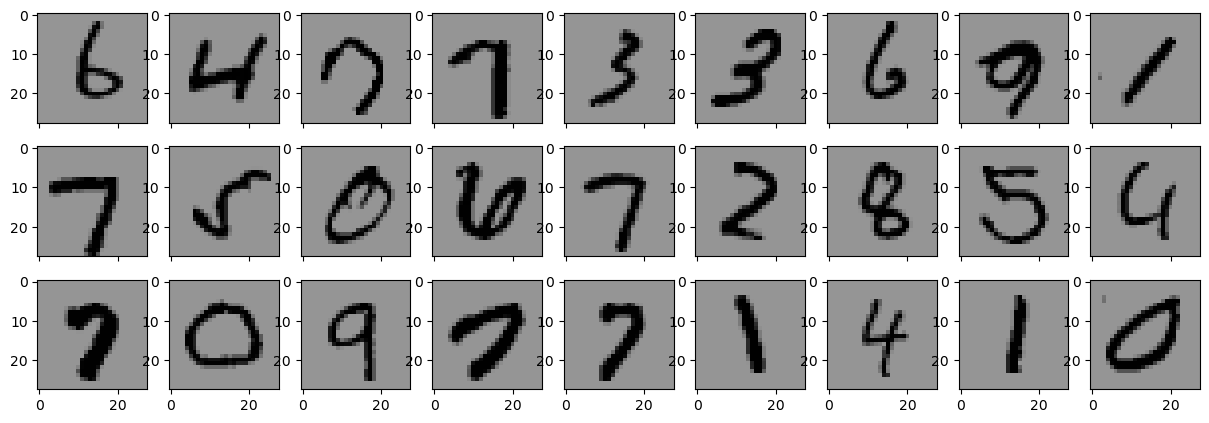

In [54]:
def show_random_digits(X):

    scale = np.abs(X).max()

    # Mostrar varios ejemplos.
    fig, axs = plt.subplots(3, 9, sharex=True)

    for ax in axs.flatten():
        x = random.choice(X)
        ax.imshow(x.reshape(28,28), interpolation='nearest', cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
        
show_random_digits(X)

Score with L1 penalty: 0.9373


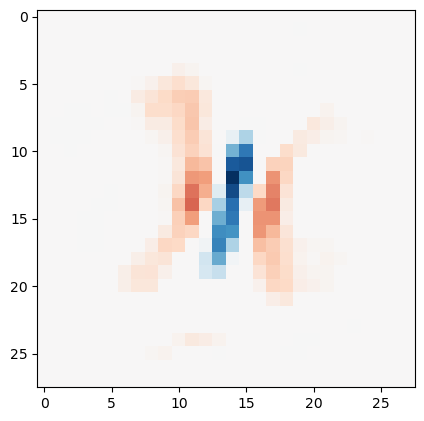

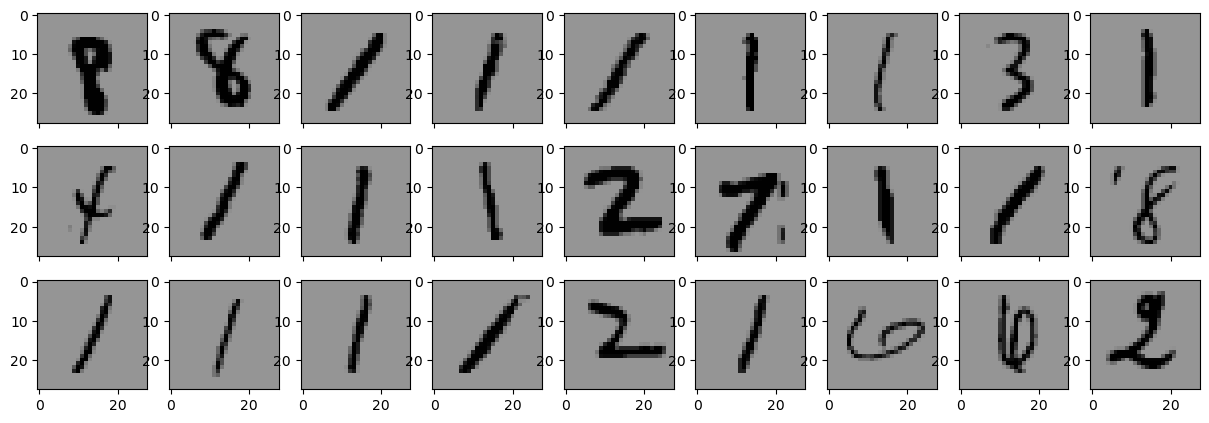

In [105]:
# Solo queremos detectar si una imagen representa un tres o no.
y_ = np.piecewise(y, [y=='1'], [1, 0]).astype('int')

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Partir el set de datos en entrenamiento y pruebas.
X_train, X_test, y_train, y_test = train_test_split(X, y_, train_size=train_samples, test_size=10000)

# Seed para el generador de numeros aleatorios.
random_state = check_random_state(2020)

# Permutar el dataset.
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]

# Flatten.
X = X.reshape((X.shape[0], -1))

# Normalize.
scaler = StandardScaler()
X_train_nor = scaler.fit_transform(X_train)
X_test_nor = scaler.transform(X_test)

# Regression.
clf = LogisticRegression(C=50. / train_samples, penalty='l1', solver='saga', tol=0.1)

# Entrenar.
clf.fit(X_train_nor, y_train)

score = clf.score(X_test_nor, y_test)
print("Score with L1 penalty: %.4f" % score)

# Mostrar
scale = np.abs(clf.coef_).max()
plt.imshow(clf.coef_[0].reshape(28, 28), interpolation='nearest', cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)

# Mostrar algunos digitos.
show_random_digits(X_test[clf.predict(X_test_nor) == 1])